# Install `pandas`

Start any cell with an exclamation mark to run shell commands from a Jupyter notebook. Here we are installing `pandas` because it wasn't installed when we built our enviornment from `environment.yml`. We can add it to `environment.yml` later, but this is just faster for now.

> If you haven't yet installed `pandas`, uncomment and run the next cell.

In [1]:
#!pip install pandas

Anytime we change the environment, we need to restart the notebook. Do that now by clicking the **Kernel > Restart Kernel** on the top menu. Next, we'll import the Python dependencies we need for this notebook.

# Notebook imports

Note that in addition to Python's builtin `datetime` module and `matplotlib`, we are also installing our own custom function, `seabass_to_pandas`,  from the local module `pigments_from_rss/seabass/to_pandas.py`

In [1]:
from datetime import datetime
import matplotlib.pyplot as plt

from pigments_from_rss.seabass.to_pandas import seabass_to_pandas

# Create `pandas.DataFrame` from SeaBASS file

The function `seabass_to_pandas` is a wrapper around Joel Scott's `readSB` class. It turns a filepath to a valid SeaBASS file directly into a pandas DataFrame:

In [2]:
df = seabass_to_pandas('example_data/NAAMES1_InLine_ACS.sb')

# Examine dataframe

`df` has 15189 rows:

In [3]:
len(df)

15189

We can examine any range of rows using the `.iloc` indexing method:

In [4]:
df.iloc[0:2]

,date,time,lat,lon,wt,sal,ap400.3,ap405,ap409.1,ap413.4,...,cp712.1_sd,cp715.6_sd,cp719.2_sd,cp722.7_sd,cp726_sd,cp729.2_sd,cp732.4_sd,cp735.6_sd,cp738.6_sd,bincount
0,20151106,20:11:00,40.4425,-70.0181,15.2038,33.1937,0.0874,0.0960,0.0973,0.0977,...,0.0054,0.006,0.0062,0.0063,0.0065,0.0063,0.0058,0.0058,0.0058,29
1,20151106,20:12:00,40.4420,-70.0141,15.1702,33.1913,0.0975,0.1011,0.1042,0.1064,...,0.0131,0.013,0.0131,0.0131,0.0130,0.0128,0.0127,0.0128,0.0127,186


You can also look at a range within an individual column using the same method:

In [5]:
df["sal"].iloc[0:2]

0    33.1937
1    33.1913
Name: sal, dtype: float64

# Add `"datetime"` column

Let's add an additional column to the dataframe. This column is a combination of the existing `"date"` and `"time"` columns into a single `"datetime"` column. The contents of this column will be Python datetime objects, which will help us when plotting timeseries below.

In [6]:
# https://stackoverflow.com/questions/466345/converting-string-into-datetime
# https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes

timestamps = [f"{df['date'][i]} {df['time'][i]}" for i in range(len(df['date']))]
datetime_objects = [datetime.strptime(t, "%Y%m%d %H:%M:%S") for t in timestamps]
df.insert(loc=0, column="datetime", value=datetime_objects)

We see that that the `"datetime"` column has been added:

In [7]:
df.iloc[0:2]

,datetime,date,time,lat,lon,wt,sal,ap400.3,ap405,ap409.1,...,cp712.1_sd,cp715.6_sd,cp719.2_sd,cp722.7_sd,cp726_sd,cp729.2_sd,cp732.4_sd,cp735.6_sd,cp738.6_sd,bincount
0,2015-11-06 20:11:00,20151106,20:11:00,40.4425,-70.0181,15.2038,33.1937,0.0874,0.0960,0.0973,...,0.0054,0.006,0.0062,0.0063,0.0065,0.0063,0.0058,0.0058,0.0058,29
1,2015-11-06 20:12:00,20151106,20:12:00,40.4420,-70.0141,15.1702,33.1913,0.0975,0.1011,0.1042,...,0.0131,0.013,0.0131,0.0131,0.0130,0.0128,0.0127,0.0128,0.0127,186


# Plots

We can plot columns from the dataframe on spatial axes like this:

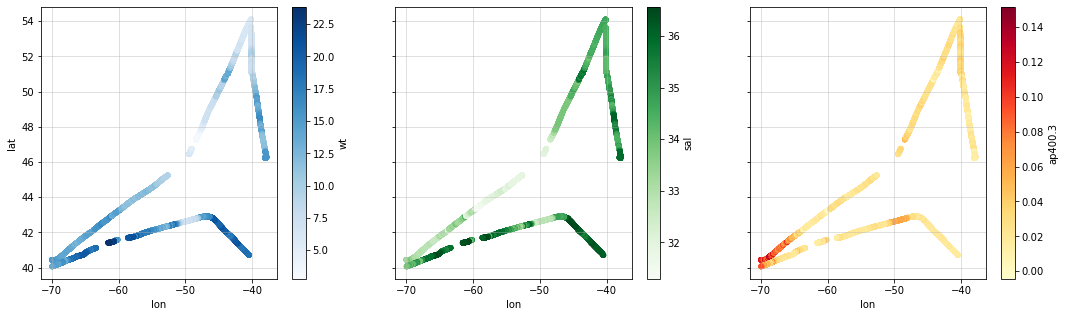

In [8]:
# https://towardsdatascience.com/the-easiest-way-to-plot-data-from-pandas-on-a-world-map-1a62962a27f3

fig, axs = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

df.plot(x="lon", y="lat", kind="scatter", c="wt", colormap="Blues", ax=axs[0])
df.plot(x="lon", y="lat", kind="scatter", c="sal", colormap="Greens", ax=axs[1])
df.plot(x="lon", y="lat", kind="scatter", c="ap400.3", colormap="YlOrRd", ax=axs[2])

for ax in axs:
    ax.grid(b=True, alpha=0.5)

And timeseries like this:

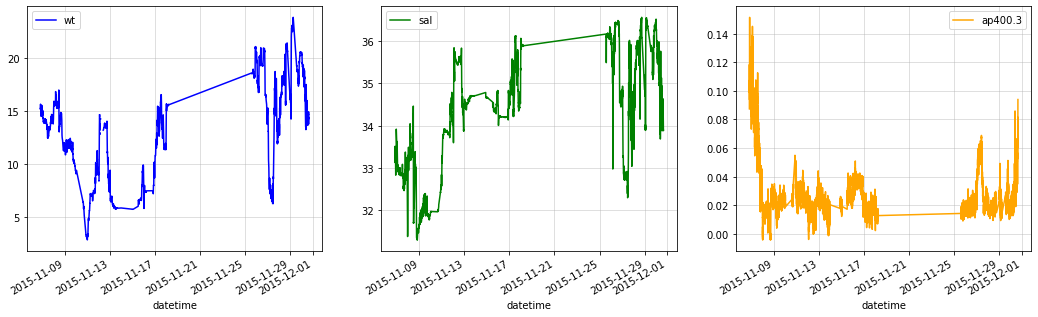

In [9]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

df.plot(x="datetime", y="wt", color="blue", ax=axs[0])
df.plot(x="datetime", y="sal", color="green", ax=axs[1])
df.plot(x="datetime", y="ap400.3", color="orange", ax=axs[2])

for ax in axs:
    ax.grid(b=True, alpha=0.5)

# View all column names

The rendering of the dataframe above truncated the columns because there were too many to easily present in the notebook. Here are all the column names:

In [10]:
print(list(df))

['datetime', 'date', 'time', 'lat', 'lon', 'wt', 'sal', 'ap400.3', 'ap405', 'ap409.1', 'ap413.4', 'ap417.8', 'ap422.8', 'ap427.7', 'ap432.2', 'ap436.4', 'ap441.2', 'ap446.2', 'ap451.5', 'ap456.6', 'ap461.1', 'ap465.9', 'ap471', 'ap476.6', 'ap481.7', 'ap486.6', 'ap491.3', 'ap496', 'ap500.7', 'ap505.7', 'ap511.1', 'ap516.5', 'ap521.8', 'ap526.5', 'ap531.3', 'ap536', 'ap540.8', 'ap545.6', 'ap550.9', 'ap555.8', 'ap560.8', 'ap565.6', 'ap570.3', 'ap574.6', 'ap579', 'ap582.4', 'ap586.6', 'ap591', 'ap595.4', 'ap600.3', 'ap604.6', 'ap609.5', 'ap614.2', 'ap619', 'ap623.5', 'ap627.9', 'ap632.4', 'ap636.7', 'ap641.3', 'ap645.8', 'ap650.4', 'ap655', 'ap659.8', 'ap664.2', 'ap668.8', 'ap673.2', 'ap677.5', 'ap681.5', 'ap685.6', 'ap689.7', 'ap693.6', 'ap697.4', 'ap701.2', 'ap704.7', 'ap708.4', 'ap712.1', 'ap715.6', 'ap719.2', 'ap722.7', 'ap726', 'ap729.2', 'ap732.4', 'ap735.6', 'ap738.6', 'ap400.3_sd', 'ap405_sd', 'ap409.1_sd', 'ap413.4_sd', 'ap417.8_sd', 'ap422.8_sd', 'ap427.7_sd', 'ap432.2_sd', 'ap43